# Exploración de datos con Python: visualización de datos

In [1]:
import pandas as pd

# Cargar datos desde un archivo de texto 
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv"
df_students = pd.read_csv(url,delimiter=',',header='infer')

# Eliminar cualquier fila con datos faltantes
df_students = df_students.dropna(axis=0, how='any')

# Calcule quién aprobó, asumiento de '60' es la calificación necesaria para aprobar
passes = pd.Series(df_students['Grade']>=60)

# Guardar quién pasó el marco de datos de Pandas
df_students = pd.concat([df_students,passes.rename("Pass")],axis=1)

# Imprimir el resultado en el notebook
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


#### Visualización de datos con Matplotlib

Los marcos de datos brindan una excelente manera de explorar y analizar datos tabulares, pero a veces una imagen vale más de mil filas y columnas. La biblioteca **Matplotlib** proporciona la base para trazar visualizaciones de datos que pueden mejorar en gran medida su capacidad de analizar los datos. 

Comencemos con un gráfico de barras simple que muestra la calificación de cada estudiante.

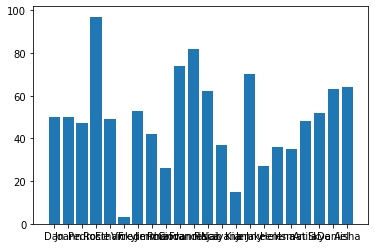

In [2]:
# Asegúrese de que los gráficos se muestren en línea en el cuaderno k

%matplotlib inline

from matplotlib import pyplot as plt

# Crear u
plt.bar(x=df_students.Name, height=df_students.Grade)

# Desplegar
plt.show()

Bueno, eso funcionó; pero al gráfico le vendrían bien algunos mejoras para que puede más claro lo que estamos viendo. 

Tenga en cuenta que utilizó la clase **pyplot** de Matplotlib para trazar el gráfico. Esta clase proporciona un montón de formas de mejorar los elementos visuales de la trama. Por ejemplo, el siguiente código:

    * Especificar elcolor de gráfico de barras. 
    * Agrega un título al gráfico (para que sepamos o que representa)
    * Agrega etiquetas a X e Y (para que sepamos qué eje muestra qué datos)
    * Gira los marcadores X (para que podamos leerlos)
    

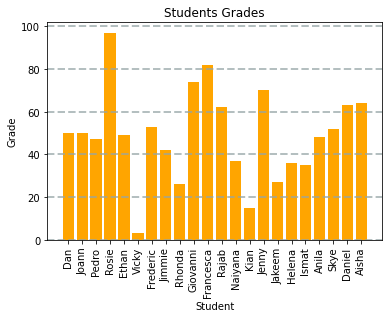

In [3]:
# Crear un gráfico de barras de nombre vs grado
plt.bar (x=df_students.Name, height=df_students.Grade, color='orange')

# Personaliza el gráfico
plt.title('Students Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Desplejar la visualización
plt.show()

Una trama está técnicamente contenida con una **figura**. En los ejemplos anteriores, la figua se creó implícitamente para usted; pero puedes crearlo explícitamente. Por ejemplo, el siguiente código crea una figura con un tamaño específico.

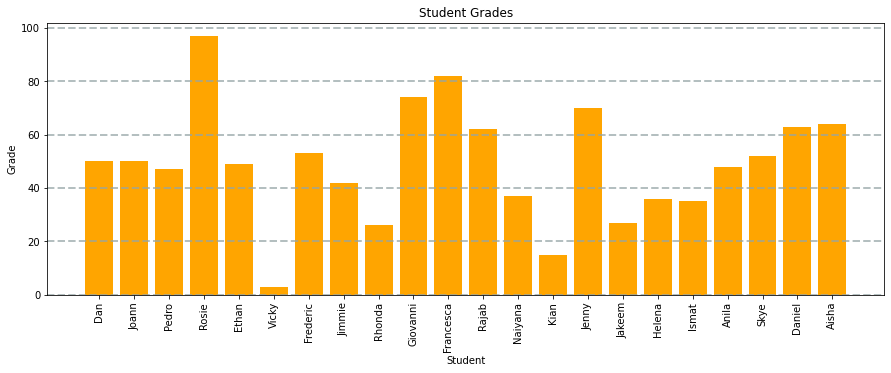

In [9]:
# Crear una figura
fig = plt.figure(figsize=(15,5))

# Crear un gráfico de barras de nombre vs grado
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

#Personaliza el gráfico
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Mostrar la figura
plt.show()

Una figura puede contener varias subtramas, cada una es su propio *eje*. 

Por ejemplo, el siguiente código crea una figura con dos subgráficos: uno es un gráfico de barras que muestra las calificaciones de los estudiantes y el otro es un gráfico circular que compara el número de calificaciones aprobatorias con las calificaciones no aprobatorias.

C:\Users\HECTO\AppData\Local\Temp\ipykernel_1640\3005409798.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\HECTO\AppData\Local\Temp\ipykernel_1640\3005409798.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


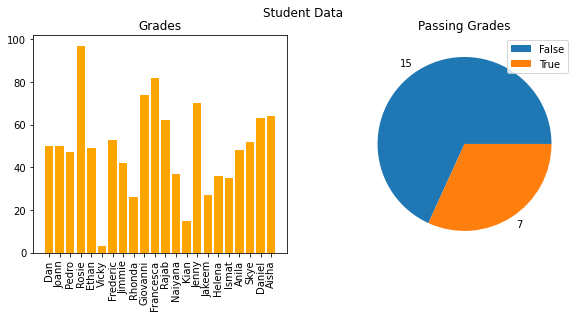

In [12]:
# Crear una figura para 2 subparcelas (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Crear una barra plot de nombre vs grado en el primer eje
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Crear un gráfico circular en base en la cuenta en el segundo eje
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Añadir un título a la Figura
fig.suptitle('Student Data')

# Show the figure
fig.show()

Hata ahora, ha utilizado métodos del objeto Matplotlib.pyplot para trazar gráficos. Sin embargo, Matplotlib es tan fundamental para los gráficos en Python que muchos paquetes, incluido Pandas, proporcionan métodos que abstraen las funciones subyacentes de Matplotlib y simplifican el trazado. Por ejemplo, DataFrame proporciona sus propios métodos para trazar datos, como se muestra en el siguiente ejemplo para trazar un gráfico de barras de horas de estudio.

<AxesSubplot:xlabel='Name'>

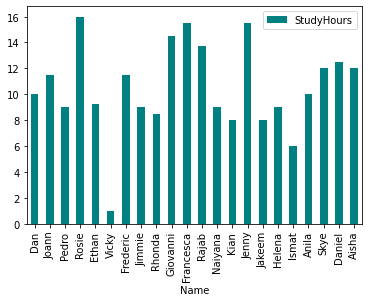

In [14]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Primeros pasos con el análisis estadístico

Ahora que sabe cómo usar Python para manipular y visuazlizar datos, puede comenzar a analizarlos.

Gran parte de la ciencia de dtos tiene su raíces en las *estadísticas*, por lo que exploraremos algunas técnicas estadíticas básicas.

> **Nota**: Esto <u>no</u> tiene la intención de enseñarle estadídtica; ese es un tema demasiado amplio par este nootbook. Sin embargo, le presentará algunos conceptos y técnicas estadísitcas que utilizan los científicos de datos mientras exploran los datos en preparación para el modelado de **machine learning**


### Estadística descriptivas y distribución de datos

Al examinar una *variable* (por eemplo, una muestra de calificaciones de los estudiantes). El punto de partida para esta exploración suele ser visualizar los datos como un histograma y ver con qué frecienci acurre cada valor de la varible.


C:\Users\HECTO\AppData\Local\Temp\ipykernel_1640\373489435.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


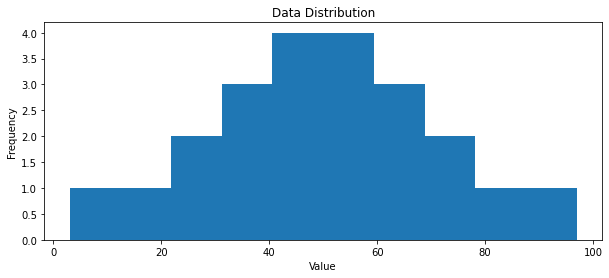

In [15]:
# Obtener la variable a examinar
var_data = df_students['Grade']

# Crear una figura
fig = plt.figure(figsize=(10,4))

# Trazar un histograma
plt.hist(var_data)

# Añsdir los títulos y las etiquetas
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Mostrar la figura
fig.show()

El histograma de calificaciones tiene un forma simétrica, donde las calificaciones que ocurren con mayor frecuencia tienden a estar en el medio del rango (alrededor de 50), con menos calificaciones en los extremos de la escala. 

### Medidas de tendencia central

Para entender mejor la distribución, podemos examinar las llamadas *medidas de tendencia central*; que es una forma elegante de describir las estadísticas que representan el "medio" de los datos. El objetivo de esto es trata de encontrar un valor "típico". Las formas comunes de definir el medio de los datos incluyen:
- La *media*: Un promedio simple badaso en sumar todos los valores en el conjunto de muestras y luego dividir el total por el número de muestras.
- La *mediana*: El valor en el medio del rango de todos los valores de la muestra.
- La *moda*: el valor que ocurre con mayor frecuencia en el conjunto d ela muestra.

Calculemos etos valores, junto con los valores mínimo y máximo para comparar, y mostémoslos en el histograma.


> <sup>\*</sup>Por supuesto, en algunos conjuntos de muestras, pueden haber un empate para el valor más común, en cuyo caso el conjunto de datos se describe como *bimodal* o incluso *multimodal*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\HECTO\AppData\Local\Temp\ipykernel_1640\2801657666.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


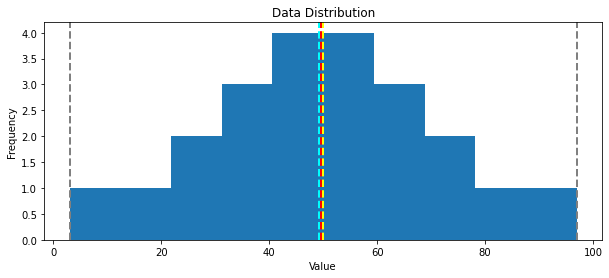

In [16]:
# Obtener la variable a examinar
var = df_students['Grade']

# Obtener las medidas de tendencia central
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Creamos la figura
fig = plt.figure(figsize=(10,4))

# Trazar un histograma
plt.hist(var)

# Añadir líneas para las medidas de tendencia central
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Anadir títulos y etiquetas
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Mostrar figura
fig.show()

Para los datos de calificación, la media, la mediana y la moda parecen estar más o menos en el medio del mínimo y el máximo, alrededor de 50.

Otra forma de visualizar la distribución de una variable es usar un diagrama de *caja* ( a veces llamado diagrama de *caja* y *bigores*). Vamos a crear uno para los datos de calificación.

C:\Users\HECTO\AppData\Local\Temp\ipykernel_1640\3917643413.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


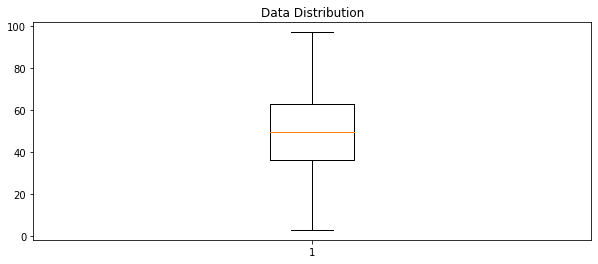

In [17]:
# Obtener la variable a examinar
var = df_students['Grade']

# Crear la figura
fig = plt.figure(figsize=(10,4))

# Trazar el histograma
plt.boxplot(var)

# Añador títulos y estiquetas
plt.title('Data Distribution')

# Mostrar la figura
fig.show()

El diagrama de caja muestra la distribución de los valores de calificación en un formato diferente al del histograma. La parte del *cuadro* de la gráfica meustra dónde residen los dos *cuartiles* internos de los datos; por lo tanto, en ese caso, la mitad de las calificaciones están entre aproximadamente 36 y 63. Los *bigotes* que se extienden desde el cuadro muestran los dos cuartiles externos; por lo que la otra mitad de las calificaciones en este caso están entreo 0 y 36 o 63 y 100. La líne en el recuadro indica el valor de la *mediana*. 

Para aprender,, puede ser útil combinar hisotramas y diagramas de caja, cambiando la orientación del diagrama de caja para alinearlo con el histograma (de alguna manera, puede ser útil pensar en l histograma como una vista de "alzado frontal" de la distribución, y el diagrama de caa como una vista de "plano" de la distribución desde arriba).

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\HECTO\AppData\Local\Temp\ipykernel_1640\309883517.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


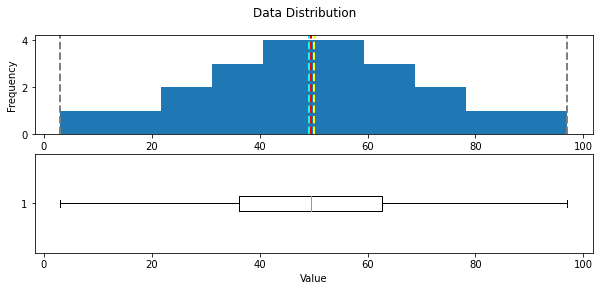

In [18]:
# Crear una función que podamos reutilizar
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Obtenemos las medidas de tendencia central
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Crear una figura para 2 subparcelas (2 filas, 1 columna)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Trazar el hisotrama
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Añadir líneas para la media, mediana y moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Trazar el diagrama de caja   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Añadir título a la figura
    fig.suptitle('Data Distribution')

    # Mostrar la figura
    fig.show()

# Obtener la variable a examinar
col = df_students['Grade']
# Llamar la la función
show_distribution(col)

Todas las medidas de tendencia central están justo en el medio de la distribución de datos, que es simétrica con valores que se vuelven progresivamente más bajos en ambar direcciones desde el medio.

Para explorar esta distribución con más detalle, debe comprender que las estadísticas consisten fundamentalmente en tomar *muestras* de datos y usar funciones de probabilidad para extrapolar información sobre la *población* total de datos.

¿qué significa esto? *Las muestras* se refieren a los datos que tenemso a mano, como información sobre los hábitos de estudio y las calificaciones de estos 22 estudiantes. La *pobración* se refiere a todos los datos posibles que podríamos recopilar, como las califiaciones y los hábitos de estudio de cada estudante en todas las instituciones educativa a lo largo de la historia. Por lo general, estamos interesados en la población, pero simplemente no es práctico recopilar todos esos datos. En su lugar, debemos intentar estimar cómo es la población a partir de la pequeña cantidad de datos (muestra) que tenemos.

Si tenemos suficientes muestras,, podemos calbular algo llamado *función de densidad de probabilidad*, que estima la distribución de calificaciones para la población completa.

La clase **pyplot** de matoplotlib proporciona una función gráfica útil para mostrar esta densidad.


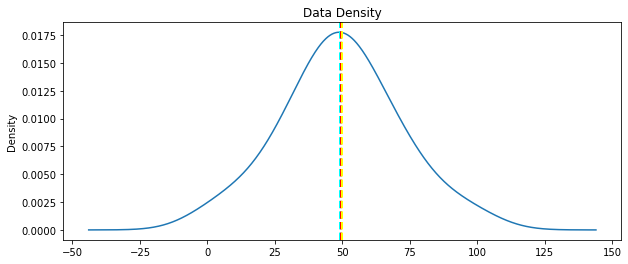

In [22]:
def show_density(var_data):
    #from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Trazar la densidad
    var_data.plot.density()

    # Añadir títulos y etiquetas
    plt.title('Data Density')

    # Mostrar la media, mediana y moda
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Mostrar la figura
    plt.show()

# Obtener la densidad de calificaciones
col = df_students['Grade']
show_density(col)

Como se esperaba del histograma de la muestra, la densiadad muestra la característica "curva de campana" de lo que los estadísticos llaman una distribución *normal con la media y la moda en el centro y colas simétricas*.

### Resumen

¡Bien hecho! Hubo una serie de conceptos nuevos aquí, así que resumamos. 

Aquí tenemos:
1. Gráficos hehcos con matplotlib
2. He visto cómo personalizar estos gráficos.
3. Estadísticas básicas calculadas, como gráficos.
4. Examinó la dispersión de datos mediante diagramas de caja e histogramas. 
5. Aprendió sobre muestras vs poblaciones.
6. Clauló cómo se vería la población de grados a partir de una muestra de calificaciones.

En nuestro próximo cuaderno, veremos la detección de datos inusuales y la búsqueda de relaciones entre los datos.

### Otras lecturas

Para obtener más información sobre los paquetes de Python que exploró en este cuaderno, consulte la siguiente documentación: 

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)